In [1]:
import numpy as np
import pandas as pd
import re

In [4]:
df = pd.read_csv('/kaggle/input/metrodata/MatroData final (1).csv')

In [5]:
df

,comment,Comment to English,Emoji to text,prediction,Compound to sentiment,max_sentiment_label,max_sentiment_value
0,ধন্যবাদ ভাই। এয়ারপোর্টে যেতে হলে উত্তরা কোন...,thanks brother. If you want to go to the airpo...,thanks brother. If you want to go to the airp...,"{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp...",positive,compound,0.8146
1,আশা করি সেপ্টেম্বরের প্রথম সপ্তাহে দেখতে পাব...,hope to see the first week of September. With,hope to see the first week of September. With,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",positive,neu,0.7340
2,কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট থেকে দূর...,"will not be easy. All away from the airport, ...","will not be easy. All away from the airport, ...","{'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'comp...",negative,neu,0.9310
3,Agargaon to Uttara,Agargaon to Uttara,Agargaon to Uttara,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,neu,1.0000
4,nice to see you in Bangladesh again. You reall...,nice to see you in Bangladesh again. You reall...,nice to see you in Bangladesh again. You reall...,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp...",positive,compound,0.8261
...,...,...,...,...,...,...,...
2002,এটি একটি উপন্যাস যে আপনি ভূগর্ভস্থ যান না যদিও...,"This is a novel that you don't go underground,...","This is a novel that you don't go underground,...","{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",positive,neu,0.8390
2003,জাপান থেকে আমাকে মাফ করবেন! ঢাকা মেট্রো চালুর ...,Excuse me from Japan! Congratulations on the l...,Excuse me from Japan! Congratulations on the l...,"{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...",positive,compound,0.9380
2004,আমি অত্যন্ত আনন্দিত যে জাপানি রেলওয়ে প্রযুক্ত...,I am delighted that Japanese railway technolog...,I am delighted that Japanese railway technolog...,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",positive,compound,0.8655
2005,সাম্প্রতিক বলে মনে হচ্ছে। আশা করি বাকিটাও তাড়...,Seems to be recent. Hope the rest can be done ...,Seems to be recent. Hope the rest can be done ...,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",positive,neu,0.8180


In [6]:
train = df.drop(['Comment to English','Emoji to text' ,'prediction','max_sentiment_label','max_sentiment_value'],axis=1)

In [7]:
train

,comment,Compound to sentiment
0,ধন্যবাদ ভাই। এয়ারপোর্টে যেতে হলে উত্তরা কোন...,positive
1,আশা করি সেপ্টেম্বরের প্রথম সপ্তাহে দেখতে পাব...,positive
2,কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট থেকে দূর...,negative
3,Agargaon to Uttara,neutral
4,nice to see you in Bangladesh again. You reall...,positive
...,...,...
2002,এটি একটি উপন্যাস যে আপনি ভূগর্ভস্থ যান না যদিও...,positive
2003,জাপান থেকে আমাকে মাফ করবেন! ঢাকা মেট্রো চালুর ...,positive
2004,আমি অত্যন্ত আনন্দিত যে জাপানি রেলওয়ে প্রযুক্ত...,positive
2005,সাম্প্রতিক বলে মনে হচ্ছে। আশা করি বাকিটাও তাড়...,positive


# Data Preprocessing

In [11]:
#train.selected_text.fillna('comment',inplace=True)

In [7]:
# def cleantext(text):
#     text = re.sub(r'@[A-Za-z0-9]+','', text) #remove mentions
#     text = re.sub(r'#','', text) #remove hash
#     text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
#     text = re.sub('\s+', ' ', text) #remove new line char
#     text = re.sub("\'", "", text) #remove single quotes
    
#     return text

In [12]:
import re

def cleantext(text):
    text = re.sub(r'@[\u0980-\u09FF]+', '', text)  # remove Bangla mentions
    text = re.sub(r'#', '', text)  # remove hash
    text = re.sub(r'https?:\/\/\S+', '', text)  # remove hyperlink
    text = re.sub(r'\s+', ' ', text)  # remove new line char
    text = re.sub(r"'", '', text)  # remove single quotes
    
    return text


In [16]:
train["comment"] = train["comment"].apply(cleantext)

In [17]:
train["comment"].head(15)

0      ধন্যবাদ ভাই। এয়ারপোর্টে যেতে হলে উত্তরা কোন স...
1      আশা করি সেপ্টেম্বরের প্রথম সপ্তাহে দেখতে পাবে...
2      কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট থেকে দূরে ...
3                                    Agargaon to Uttara
4     nice to see you in Bangladesh again. You reall...
5     Your Bengali speaking is very good 😊😊😊. I also...
6                               আমার সো-সোনার বাংলাদেশ!
7           এই অনৈতিক কাজের নিউজ ও জবাব দিহি আশা করছি 😐
8                                 - জসীম উদ্‌দীন---হাসু
9                                             ... Sihab
10                                         ”আমরা করব জয়
11                        （What a great anniversary! !）
12    [] Bangladesh Prime Minister Sheikh Hasina is ...
13    [] Sheikh Hasina has bigger fish to fry and it...
14                      ৫-১০ মিনিট পরে পরে ট্রেন আছে...
Name: comment, dtype: object

In [19]:
import string
train["comment"] = train["comment"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])

In [20]:
train["comment"] = train["comment"].apply(lambda wrd: ''.join(wrd))

In [21]:
train["comment"]

0        ধন্যবাদ ভাই। এয়ারপোর্টে যেতে হলে উত্তরা কোন স...
1        আশা করি সেপ্টেম্বরের প্রথম সপ্তাহে দেখতে পাবে...
2        কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট থেকে দূরে ...
3                                      agargaon to uttara
4       nice to see you in bangladesh again you really...
                              ...                        
2002    এটি একটি উপন্যাস যে আপনি ভূগর্ভস্থ যান না যদিও...
2003    জাপান থেকে আমাকে মাফ করবেন ঢাকা মেট্রো চালুর জ...
2004    আমি অত্যন্ত আনন্দিত যে জাপানি রেলওয়ে প্রযুক্ত...
2005    সাম্প্রতিক বলে মনে হচ্ছে। আশা করি বাকিটাও তাড়...
2006    এটা আশ্চর্যজনক যে একটি ট্রেন স্টেশনে একজন পুলি...
Name: comment, Length: 2007, dtype: object

In [13]:
from nltk.corpus import stopwords

In [22]:
import pandas as pd
import re

# Example list of Bangla stopwords (this list should be extended for better accuracy)
bangla_stopwords = [
    'এ', 'ও', 'তাতে', 'কখন', 'কিন্তু', 'কিংবা', 'কি', 'কী', 'কে', 'কেন', 
    'খুব', 'গিয়ে', 'গিয়েছে', 'গেলে', 'গো', 'চলে', 'থাকতে', 
    'থেকে', 'থেকে', 'থেকে', 'দেওয়া', 'দিয়ে', 'দুই', 'দুটি', 'দুঃখিত', 
    'দে', 'দেখা', 'দেওয়া', 'ধরা', 'ধরার', 'ধরে', 'নয়', 'না', 'নাকি', 
    'নি', 'নিয়ে', 'নিবে', 'নিয়েছে', 'নিয়ে', 'নীচে', 'পরে', 'পরে', 
    'পর্যন্ত', 'পর্যন্ত', 'পেয়ে', 'পেয়ে', 'পি', 'প্রতি', 'ফিরে', 
    'বসে', 'বলল', 'বললো', 'বললেন', 'বলে', 'বলেন', 'বসে', 'বসে', 'বা', 
    'বাড়ি', 'ভাবে', 'মধ্যে', 'মধ্যেই', 'যখন', 'যদি', 'যা', 'যায়', 
    'যিনি', 'যাবে', 'যা', 'যাও', 'যাদের', 'যে', 'যেমন', 'যেখানে', 
    'যিনি', 'যে', 'রয়েছে', 'রাখা', 'রাখে', 'রয়েছে', 'লেখা', 'লাগে', 
    'শুরু', 'শুধু', 'সব', 'সময়', 'সবার', 'সে', 'স্পষ্ট', 'সেই', 
    'সেখান', 'সেখানে', 'হয়', 'হলে', 'হল', 'হলো', 'হলেই', 'হিসাবে', 
    'হৈ', 'হয়', 'হয়ে', 'হয়নি', 'হলেও', 'হয়', 'হয়েছে', 'হয়েছিল', 
    'হয়ে', 'হয়', 'হলেই', 'হয়ে', 'হয়', 'হলেও'
]

def remove_stopwords_bangla(text):
    words = text.split()
    filtered_words = [word for word in words if word not in bangla_stopwords]
    return ' '.join(filtered_words)



# Apply the function to the first 50 rows (or fewer if the DataFrame has less than 50 rows)
train['comment'][:50] = train['comment'][:50].apply(remove_stopwords_bangla)

# Display the cleaned text
print(train['comment'][:50])


0     ধন্যবাদ ভাই। এয়ারপোর্টে যেতে উত্তরা কোন স্তেশন...
1     আশা করি সেপ্টেম্বরের প্রথম সপ্তাহে দেখতে পাবেন...
2     কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট দূরে তবে আপ...
3                                    agargaon to uttara
4     nice to see you in bangladesh again you really...
5     your bengali speaking is very good 😊😊😊 i also ...
6                                 আমার সোসোনার বাংলাদেশ
7             এই অনৈতিক কাজের নিউজ জবাব দিহি আশা করছি 😐
8                                      জসীম উদ্‌দীনহাসু
9                                                 sihab
10                                         ”আমরা করব জয়
11                          （what a great anniversary ）
12    bangladesh prime minister sheikh hasina is bey...
13    sheikh hasina has bigger fish to fry and its a...
14                                  ৫১০ মিনিট ট্রেন আছে
15                                  ভাড়া ৪০ আর সকল ৮ টা
16      thle kon kon jaiga theke train jai blben please
17                                      অনেকসুন্

In [14]:
# train["selected_text"][:50] = train["selected_text"][:50].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("english")]))

In [23]:
train["comment"]

0       ধন্যবাদ ভাই। এয়ারপোর্টে যেতে উত্তরা কোন স্তেশন...
1       আশা করি সেপ্টেম্বরের প্রথম সপ্তাহে দেখতে পাবেন...
2       কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট দূরে তবে আপ...
3                                      agargaon to uttara
4       nice to see you in bangladesh again you really...
                              ...                        
2002    এটি একটি উপন্যাস যে আপনি ভূগর্ভস্থ যান না যদিও...
2003    জাপান থেকে আমাকে মাফ করবেন ঢাকা মেট্রো চালুর জ...
2004    আমি অত্যন্ত আনন্দিত যে জাপানি রেলওয়ে প্রযুক্ত...
2005    সাম্প্রতিক বলে মনে হচ্ছে। আশা করি বাকিটাও তাড়...
2006    এটা আশ্চর্যজনক যে একটি ট্রেন স্টেশনে একজন পুলি...
Name: comment, Length: 2007, dtype: object

In [24]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),     deacc=True))

In [25]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [29]:
temp = []
data_to_list = train['comment'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(data_to_list[i])
data_wordslem = list(sent_to_words(temp))

Using Lemmatizer instead of stemming. Lemmatizer is preffered over stemming. Lemmatizer find the root word whereas Stemmizer shorten the word. For Example, word 'Caring' -> Lemmatizer -> 'Care' WHEREAS 'Caring' -> Stemming -> 'Car'

In [32]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()

In [33]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [34]:
for i in range(len(data_wordslem)):
    for j in range(len(data_wordslem[i])):
        data_wordslem[i][j] = lemmatizer.lemmatize(data_wordslem[i][j],pos="v")

In [35]:
data = []
for i in range(len(data_wordslem)):
    data.append(detokenize(data_wordslem[i]))
print(data[:5])

['ধনযব এয রপ রট উততর সত শন মল সহজ ওয বলব পল', 'আশ কর পট মবর পরথম সপত খত', 'নট সহজ হব সবট এয রপ রট দর তব আপন উততর নট সট শন অট উন হয রব', 'agargaon to uttara', 'nice to see you in bangladesh again you really like bangladesh like your video very much']


# Building a Model

In [36]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import regularizers

# Tokenizing and adding padding

In [37]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   28  408  194]
 [   0    0    0 ...  229 1048  125]
 [   0    0    0 ...  644   15  130]
 ...
 [   0    0    0 ...  243 1574   11]
 [   0    0    0 ...  150    1    1]
 [   0    0    0 ...   33 3571   48]]


In [38]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

# Using BiDirectional RNN and LSTM

Bidirectional RNN is preffered over simple RNN because Bidirectional RNN will keep the activations of future words while predicting activations of current words using backprop through time. LSTM (long short term memory) is used to remember the word. Its like a memory of Neual Networks. (I learn this in Deep Learning Specialization course by Andrew Ng)

In [39]:
from keras.models import Sequential
from keras import layers

model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))

In [40]:
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# Label Encoding of output

In [41]:
import tensorflow as tf
labels = np.array(train['Compound to sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

# Training the Model

In [42]:
history = model2.fit(x = tweets, y= labels, epochs=25,validation_split=0.2)

Epoch 1/25
51/51 [==============================] - 13s 170ms/step - loss: 0.9620 - accuracy: 0.5308 - val_loss: 0.9624 - val_accuracy: 0.4677
Epoch 2/25
51/51 [==============================] - 8s 161ms/step - loss: 0.8725 - accuracy: 0.5882 - val_loss: 0.9306 - val_accuracy: 0.4652
Epoch 3/25
51/51 [==============================] - 8s 148ms/step - loss: 0.7632 - accuracy: 0.6667 - val_loss: 0.8491 - val_accuracy: 0.6144
Epoch 4/25
51/51 [==============================] - 8s 152ms/step - loss: 0.6290 - accuracy: 0.7701 - val_loss: 0.8024 - val_accuracy: 0.6642
Epoch 5/25
51/51 [==============================] - 8s 149ms/step - loss: 0.5306 - accuracy: 0.7894 - val_loss: 0.7999 - val_accuracy: 0.6517
Epoch 6/25
51/51 [==============================] - 8s 167ms/step - loss: 0.4486 - accuracy: 0.8237 - val_loss: 0.8429 - val_accuracy: 0.6617
Epoch 7/25
51/51 [==============================] - 7s 147ms/step - loss: 0.3932 - accuracy: 0.8474 - val_loss: 0.8625 - val_accuracy: 0.6617
Epoch

In [44]:
import matplotlib.pyplot as plt

# Visualizing Loss

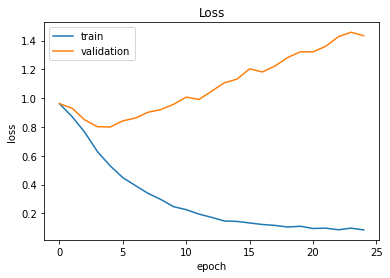

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

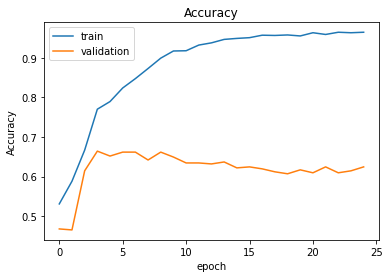

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prediction and Result

In [47]:
sentiment = ['Neutral','Negative','Positive']

In [52]:
train

,comment,Compound to sentiment
0,ধন্যবাদ ভাই। এয়ারপোর্টে যেতে উত্তরা কোন স্তেশন...,positive
1,আশা করি সেপ্টেম্বরের প্রথম সপ্তাহে দেখতে পাবেন...,positive
2,কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট দূরে তবে আপ...,negative
3,agargaon to uttara,neutral
4,nice to see you in bangladesh again you really...,positive
...,...,...
2002,এটি একটি উপন্যাস যে আপনি ভূগর্ভস্থ যান না যদিও...,positive
2003,জাপান থেকে আমাকে মাফ করবেন ঢাকা মেট্রো চালুর জ...,positive
2004,আমি অত্যন্ত আনন্দিত যে জাপানি রেলওয়ে প্রযুক্ত...,positive
2005,সাম্প্রতিক বলে মনে হচ্ছে। আশা করি বাকিটাও তাড়...,positive


In [49]:
sequence = tokenizer.texts_to_sequences(['সাম্প্রতিক বলে মনে হচ্ছে। আশা করি বাকিটাও '])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

'Neutral'

In [50]:
sequence = tokenizer.texts_to_sequences(['Agargaon to Uttara'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

'Neutral'

In [51]:
sequence = tokenizer.texts_to_sequences(['কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট থেকে দূর'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

'Positive'

In [53]:
sequence = tokenizer.texts_to_sequences(['এটি একটি উদাহরণ টেক্সট যেখানে অনেক স্টপওয়ার্ড রয়েছে।'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

'Neutral'

# My Review

Although the model is predicting fine, but from the loss, we can easily see that the model is Overfitting since the train loss is small and validation loss is very high. To prevent overfitting, we need to add some regularization in the model.

# Building model again with some regularization

In [54]:
model = Sequential()
model.add(layers.Embedding(max_words, 40, input_length=max_len))
model.add(layers.BatchNormalization())
model.add(layers.Bidirectional(layers.LSTM(15,dropout=0.6)))
model.add(layers.Dense(3,activation='softmax'))

In [55]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history2 = model.fit(x = tweets, y= labels, epochs=30,validation_split=0.2)

Epoch 1/30
51/51 [==============================] - 13s 167ms/step - loss: 0.9499 - accuracy: 0.5389 - val_loss: 0.9925 - val_accuracy: 0.4204
Epoch 2/30
51/51 [==============================] - 8s 167ms/step - loss: 0.8709 - accuracy: 0.6000 - val_loss: 0.9936 - val_accuracy: 0.4154
Epoch 3/30
51/51 [==============================] - 8s 150ms/step - loss: 0.7818 - accuracy: 0.6617 - val_loss: 0.9858 - val_accuracy: 0.4204
Epoch 4/30
51/51 [==============================] - 8s 150ms/step - loss: 0.7170 - accuracy: 0.7028 - val_loss: 0.9592 - val_accuracy: 0.4677
Epoch 5/30
51/51 [==============================] - 8s 148ms/step - loss: 0.6552 - accuracy: 0.7352 - val_loss: 0.9876 - val_accuracy: 0.4602
Epoch 6/30
51/51 [==============================] - 8s 165ms/step - loss: 0.6089 - accuracy: 0.7539 - val_loss: 0.8967 - val_accuracy: 0.5721
Epoch 7/30
51/51 [==============================] - 8s 150ms/step - loss: 0.5754 - accuracy: 0.7632 - val_loss: 0.9670 - val_accuracy: 0.5249
Epoch

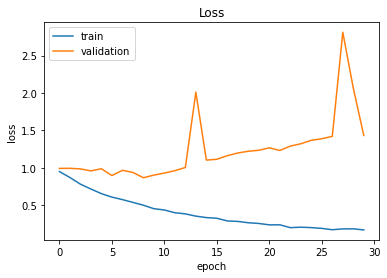

In [57]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

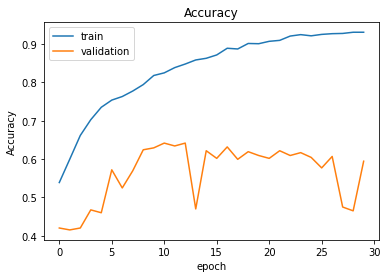

In [58]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prediction and Result

In [59]:
sequence = tokenizer.texts_to_sequences(['কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট থেকে দূর'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

'Positive'

In [61]:
sequence = tokenizer.texts_to_sequences(['তুমি ভালো আছো না'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

'Neutral'

In [62]:
sequence = tokenizer.texts_to_sequences([' আমরা খেতে যাব না'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

'Neutral'

# My Review

After adding some regularization and lowing the complexity of Neural network, the model is working fine as we can see from the loss and accuracy graph.